## ENCODING DNA SEQUENCES INTO COMPLEX NUMBERS AND CLASSIFICATION WITH COMPLEX-VALUED CONVOLUTIONAL ARTIFICIAL NEURAL NETWORKS:

### STEP 1: (Data import) Raw DNA sequences of Kinase and GPCR proteins are imported separately in fasta form using accession numbers from NCBI gene bank. Kinase and GPCR DNA sequences are imported separately in two stages.
####  Note:Due to possible updates to the NCBI Site, the dataset of the Sequences used in the study has been uploaded to GitHub. Using this dataset, the Study can start from step 2.

### STEP 2: (Data preprocessing) DNA sequences of Kinase and GPCR proteins are labelled as "1" and "0", limited to 900, randomly mixed and combined and saved as a single dataframe in fasta form.

### STEP 3: (Complex Coding)  The combined dataframe in categorical form is converted into complex numbers by the proposed Complex Coding Method and saved as a complex-valued dataframe.

### STEP 4: (Classification) Using complex-valued dataframe, Kinase and GPCR proteins are classified by Complex-Valued Convolutıonal Neural Networks method.

### STEP 5: (Results and Graphs) Classification results measured by different metrics are visualised with Graphs.

### STEP 6: 10-FOLD CROSS-VALIDATION AND METRIC AVERAGE



## STEP 1:DATA IMPORT

### a) DNA sequences of Kinase proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
#For the kinase protein family, it imports 100 nucleotide sequence samples corresponding to proteins (CDS) from NCBI and saves them in a file:
#Importing 100 nucleotide sequences (CDS) for kinase:
#Note:Due to possible updates to the NCBI Site, the dataset of the Sequences used in the study has been uploaded to GitHub. 
#Using this dataset, the Study can start from step 2

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"  #  email goes here

# Define protein accession numbers
accessions = ["CAA77753.1",
"CAA77752.1",
"CAA42411.1",
"CAA33389.1",
"CAA42556.1",
"CAA42713.1",
"CAA44396.1",
"CAA42744.1",
"CAA38700.1",
"CAA40491.1",
"CAA43372.1",
"CAA46388.1",
"NP_001015048.1",
"CAA78813.1",
"CAA39849.1",
"CAA47001.1",
"CAA47002.1",
"CAA47004.1",
"CAA47006.1",
"CAA47008.1",
"AAH93072.1",
"AAA51548.1",
"AAA35503.1",
"AAA58363.1",
"AAA58364.1",
"AAA58391.1",
"AAB50921.1",
"AAB50922.1",
"AAA58424.1",
"NP_060260.3",
"AAH93822.1",
"AAA76851.1",
"AAA52025.1",
"AAA96609.1",
"AAA98744.1",
"AAH92416.1",
"AAC14449.1",
"AAC14450.1",
"AAC14451.1",
"AAA58459.1",
"NP_008959.3",
"NP_001015878.1",
"BAD96360.1",
"AAA59502.1",
"AAA59555.1",
"AAB59362.1",
"AAA36318.1",
"AAA36406.1",
"AAB59449.1",
"AAA36409.1",
"AAA36410.1",
"AAA36411.1",
"AAA03176.1",
"AAA18253.1",
"AAA36442.1",
"AAA60095.1",
"BAD96365.1",
"AAA60099.1",
"AAA60170.1",
"AAA03175.1",
"AAC41690.1",
"AAA60102.1",
"AAA60100.1",
"AAA60104.1",
"AAA36449.1",
"AAA36539.1",
"BAA01547.1",
"AAC82497.1",
"BAD96423.1",
"AAB26341.1",
"AAA35639.1",
"AAA58620.1",
"AAA52643.1",
"AAA52644.1",
"AAA36206.1",
"AAA59540.1",
"AAA36488.1",
"AAA36748.1",
"CAA48870.1",
"CAA41728.1",
"CAA51837.1",
"BAD96489.1",
"AAA36585.1",
"AAA36614.1",
"AAA36615.1",
"AAA52576.1",
"AAA36657.1",
"AAA60078.1",
"AAA60175.1",
"AAA18284.1",
"AAA36659.1",
"AAA18251.1",
"BAD96647.1",
"AAA03565.1",
"AAA60171.1",
"AAC50062.1",
"AAA35673.1",
"AAA16703.1",
"CAA53536.1",
"AAA18225.1"]  # Replace with your protein accession number

# Fetch nucleotide sequences coding for the proteins and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta_cds_na", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(".")[0]  # Remove version number
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\KİNASE_DNA_Fasta.xlsx", index=False)

- Below are the first five lines of the KİNAZ DNA sequences downloaded to the file, printed with .head():

In [37]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_DNA_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  lcl|Z11695  ATGGTCCGCGGGCAGGTGTTCGACGTGGGGCCGCGCTACACCAACC...
1  lcl|Z11694  ATGGCGGCGGCGGCGGCGGCGGGCGCGGGCCCGGAGATGGTCCGCG...
2  lcl|X59727  ATGGCTGAGAAGGGTGACTGCATCGCCAGTGTCTATGGGTATGACC...
3  lcl|X15334  ATGCCCTTCTCCAACAGCCACAACGCACTGAAGCTGCGCTTCCCGG...
4  lcl|X59932  ATGTCAGCAATACAGGCCGCCTGGCCATCCGGTACAGAATGTATTG...


###  b) DNA sequences of GPCR proteins with accession numbers from NCBI are imported and saved as 'fasta'.



In [ ]:
#For the kinase protein family, imports the 100 nucleotide sequence (CDS) from NCBI and saves it to a file:

# Importing GPCR nucleotide sequence (CDS)

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"  # Your email goes here

# Define protein accession numbers
accessions = ["CAA77746.1",
"CAA40530.1",
"CAA38699.1",
"CAA39286.1",
"CAA45319.1",
"CAA33336.1",
"CAA33337.1",
"CAA77558.1",
"CAA40963.1",
"AAA35491.1",
"AAA58353.1",
"AAA58355.1",
"AAA51570.1",
"AAA51598.1",
"AAA35535.1",
"AAA62831.1",
"AAA58408.1",
"AAB05207.1",
"AAA88024.1",
"AAA52342.1",
"AAA35847.1",
"AAA52478.1",
"AAA88050.1",
"AAA58647.1",
"AAA58675.1",
"AAA36108.1",
"AAA59933.1",
"AAA36366.1",
"AAA16594.1",
"AAA60001.1",
"AAA60070.1",
"BAA01920.1",
"BAA14398.1",
"BAA01720.1",
"BAA01050.1",
"BAA01722.1",
"BAA02445.1",
"CAA43953.1",
"CAA39284.1",
"AAA35604.1",
"AAA35924.1",
"AAA16617.1",
"CAA50641.1",
"CAA68560.1",
"AAB25531.1",
"AAB26273.1",
"AAA36605.1",
"AAA58247.1",
"AAA60315.1",
"AAA60316.1",
"AAA36641.1",
"AAA36646.1",
"AAA60601.1",
"AAA03651.1",
"CAA52376.1",
"AAC37538.1",
"AAA03209.1",
"AAC52063.1",
"CAA50979.1",
"AAC13372.1",
"AAC13373.1",
"CAA54182.1",
"AAA36434.1",
"AAA60002.1",
"AAA17684.1",
"BAA05840.1",
"AAA73958.1",
"AAA74230.1",
"CAA54031.1",
"AAA19119.1",
"AAB60351.1",
"CAA84380.1",
"AAA98990.1",
"CAA46621.1",
"AAB60656.1",
"AAC09005.1",
"BAA03319.1",
"AAB29854.1",
"AAB31320.1",
"AAB59437.1",
"AAC14460.1",
"AAA64592.1",
"AAA64593.1",
"BAA04120.1",
"AAC50158.1",
"AAA63180.1",
"AAA62837.1",
"AAA63181.1",
"AAA61794.1",
"CAA58749.1",
"CAA58739.1",
"CAA58740.1",
"AAB59486.1",
"AAA62158.1",
"AAB59487.1",
"AAA98457.1",
"AAA62271.1",
"AAA63906.1",
"BAA08618.1",
"CAA57019.1"]  # Replace with your protein accession number

# Fetch nucleotide sequences coding for the proteins and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta_cds_na", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(".")[0]  # Remove version number
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\GPCR_DNA_Fasta.xlsx", index=False)

- Below are the first five lines of the GPCR DNA sequences downloaded to the file, printed with .head():

In [38]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\GPCR_DNA_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  lcl|Z11687  ATGCTCATGGCGTCCACCACTTCCGCTGTGCCTGGGCATCCCTCTC...
1  lcl|X57250  ATGAACTCCTTCAATTATACCACCCCTGATTATGGGCACTATGATG...
2  lcl|X54937  ATGAAGTCGATCCTAGATGGCCTTGCAGATACCACCTTCCGCACCA...
3  lcl|X55760  ATGAGGACTCTGAACACCTCTGCCATGGACGGGACTGGGCTGGTGG...
4  lcl|X63819  ATGGAAACCAACTTCTCCACTCCTCTGAATGAATATGAAGAAGTGT...


### STEP 2 : DATA PREPROCESSING

### DNA sequences of Kinase and GPCR proteins located in two different files are labeled "1" and "0", limited to 900, randomly mixed and combined, and saved as a single data frame in fasta form.

In [ ]:
#It labels the DNA fasta sequences of kinase and GPCR as "1" and "0", delimits them, randomly shuffles them and saves them as a single dataframe.

import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import cmath

# Step 1: Load and labelling data
kinaz_df = pd.read_excel("D:\datasetTEZ\KİNASE_DNA_Fasta.xlsx")
kinaz_df['label'] = (1)

gpcr_df = pd.read_excel("D:\datasetTEZ\GPCR_DNA_Fasta.xlsx")
gpcr_df['label'] = (0)

# Step 2: Limit protein sequences to 300 characters
kinaz_df['Sequence'] = kinaz_df['Sequence'].str[:900]
gpcr_df['Sequence'] = gpcr_df['Sequence'].str[:900]

#  Step 3: Combine data and shuffle randomly
combined_df = pd.concat([kinaz_df, gpcr_df])
shuffled_df = shuffle(combined_df)

# Step 4: Save data as dataframe in a single Excel file
shuffled_df.to_excel("D:\datasetTEZ\KİNASE_GPCR_DNA_fasta.xlsx", index=False)

###

- The first five lines of the dataframe for the KINASE (1) and GPCR (0) DNA sequences are as follows:

In [39]:
#Print the first 5 rows using .head()
import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_DNA_fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

# Print the first 5 rows using .head()
print(output_data.head())

      Accession                                           Sequence  label
0    lcl|M97759  ATGCTGCTGGAGACACAGGACGCGCTGTACGTGGCGCTGGAGCTGG...      0
1    lcl|U02680  ATGTCCCACCAGACCGGCATCCAAGCAAGTGAAGATGTTAAAGAGA...      1
2    lcl|X63819  ATGGAAACCAACTTCTCCACTCCTCTGAATGAATATGAAGAAGTGT...      0
3  lcl|AK222640  ATGTTTGCAGACTTGGATTATGACATCGAAGAGGATAAACTCGGAA...      1
4  lcl|AH002937  ATGTCGCTTTCTAACAAGCTGACGCTGGACAAGCTGGACGTTAAAG...      1


### STEP 3: COMPLEX ENCODİNG

###  The data frame in Categorical (Fasta) form consisting of kinase and GPCR DNA sequences is converted to complex numbers by the proposed Complex Coding Method and saved as a complex value data frame.

In [ ]:
#Encoding DNA fasta data into complex numbers by the proposed method and saving it as a complex dataframe:

import pandas as pd
import numpy as np
import cmath
import random

 # Step 1: Get DNA nucleotide sequences from Excel file
dosya_yolu = "D:\datasetTEZ\KİNASE_GPCR_DNA_fasta.xlsx"
df = pd.read_excel(dosya_yolu)

# Step 2: Map nucleotides to complex numbers
karakter_sayi_degerleri = {'A':1j, 'T':- 1j, 'G':1, 'C':- 1}

def dna_to_complex(dna_seq):
    kompleks_dizi = [(i+1) * karakter_sayi_degerleri.get(nucleotide, 0) for i, nucleotide in enumerate(dna_seq)]
    return kompleks_dizi

df['complex'] = df['Sequence'].apply(dna_to_complex)

# Step 3: Calculate and round the real part, imaginary part, modulus and angle of the resulting complex numbers
def calculate_properties(complex_numbers):
    real_parts = [round(z.real, 5) for z in complex_numbers]
    imag_parts = [round(z.imag, 5) for z in complex_numbers]
    magnitudes = [round(abs(z), 5) for z in complex_numbers]
    angles_deg = [round(cmath.phase(z) * 180 / cmath.pi, 5) for z in complex_numbers]
    return real_parts, imag_parts, magnitudes, angles_deg

df[['Real', 'Imag', 'Mode', 'Median Angle']] = df['complex'].apply(calculate_properties).apply(pd.Series)

# Step 4: Save complex data as dataframe
output_path = "D:\datasetTEZ\KİNASE_GPCR_DNA_Complex_Encoded.xlsx"
df.to_excel(output_path, index=False)

###

- The first 5 lines of the data frame formed by encoding DNA sequences into complex numbers are given below:(Accession (CDS), complex number, real, Imag, Mode, Angle)

In [40]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_DNA_Complex_Encoded.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

      Accession                                           Sequence  label  \
0    lcl|L08177  ATGGATATACAAATGGCAAACAATTTTACTCCGCCCTCTGCAACTC...      0   
1    lcl|L05597  ATGGATTTCTTAAATTCATCTGATCAAAACTTGACCTCAGAGGAAC...      0   
2    lcl|L08835  ATGTCAGCCGAGGTGCGGCTGAGGCGGCTCCAGCAGCTGGTGTTGG...      1   
3  lcl|AK222927  ATGTCGAAGCCCCATAGTGAAGCCGGGACTGCCTTCATTCAGACCC...      1   
4  lcl|AH003177  ATGGACCTGGGGAAACCAATGAAAAGCGTGCTGGTGGTGGCTCTCC...      0   

                                             complex  \
0  [1j, -2j, 3, 4, 5j, -6j, 7j, -8j, 9j, -10, 11j...   
1  [1j, -2j, 3, 4, 5j, -6j, -7j, -8j, -9, -10j, -...   
2  [1j, -2j, 3, -4j, -5, 6j, 7, -8, -9, 10, 11j, ...   
3  [1j, -2j, 3, -4j, -5, 6, 7j, 8j, 9, -10, -11, ...   
4  [1j, -2j, 3, 4, 5j, -6, -7, -8j, 9, 10, 11, 12...   

                                                Real  \
0  [0.0, 0.0, 3, 4, 0.0, 0.0, 0.0, 0.0, 0.0, -10,...   
1  [0.0, 0.0, 3, 4, 0.0, 0.0, 0.0, 0.0, -9, 0.0, ...   
2  [0.0, 0.0, 3, 0.0, -5, 0.0, 7

- An example of an DNA sequence encoded by the complex method would appear in the complex plane as follows:

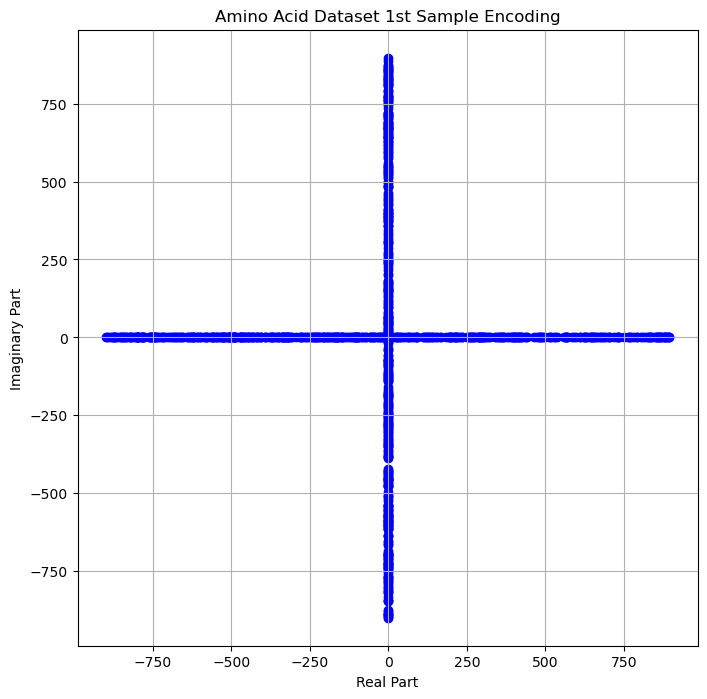

In [41]:
#Plot of the complex numbers of a coded DNA sequence on a plane
import matplotlib.pyplot as plt

# Complex numbers of a coded DNA sequence
complex_numbers = [1j, -2j, 3, 4j, 5j, -6, 7j, -8j, -9, 10j, -11, 12j, 13j, 14j, -15, -16j, 17, -18j, 19j, -20, -21, 22j, -23, 24j, 25, 26j, 27, 28, -29, -30, 31j, 32, -33, 34j, -35j, 36, 37, -38, -39j, 40j, -41j, 42j, 43j, 44, 45j, -46, -47, -48, 49j, 50j, 51, 52j, -53, -54, 55j, -56j, -57, 58j, -59, -60j, 61, 62j, 63, 64j, 65j, 66, 67j, -68j, 69, -70, -71j, -72, 73j, -74j, -75j, -76j, 77, -78, 79j, -80j, 81, 82j, -83, -84j, -85, -86j, 87, 88, -89j, 90, 91, -92j, -93, 94j, -95j, -96, 97j, -98, -99, 100j, -101, -102, -103, -104j, -105, 106j, -107, -108, 109j, -110, 111, -112j, -113j, 114, -115, -116j, 117, 118j, 119j, -120, -121j, -122j, 123, 124, -125, -126j, 127, -128j, 129, 130j, -131j, -132, 133j, -134j, 135, 136, -137, -138j, 139j, -140j, -141j, 142, 143, -144, 145j, -146, -147, 148j, -149, -150, 151j, 152j, 153, 154j, 155j, 156, -157, -158j, -159, -160, 161j, -162, -163, 164j, 165, -166, -167, -168j, 169, -170, -171, 172j, 173j, -174, -175j, 176j, -177, -178, -179j, 180j, 181j, -182j, -183, -184j, 185, -186j, -187j, -188, -189j, -190, -191j, 192, 193, -194, -195, 196, -197j, 198, 199j, -200, 201, 202, 203j, -204, -205, -206j, -207, -208, -209j, 210, 211, -212j, 213, 214, -215, 216j, 217, -218j, 219, -220, -221j, -222, 223, -224j, -225, 226j, -227j, 228, -229, -230, -231, -232, -233j, 234, 235j, 236, -237, 238j, -239j, -240, 241j, -242j, -243, -244j, 245j, -246, 247j, -248j, -249j, 250, -251j, -252, 253j, -254j, 255, 256, 257j, -258j, -259, 260, -261, -262j, 263, 264, 265j, 266j, 267, -268, -269j, -270j, 271, 272, 273, -274j, 275j, -276, -277j, -278j, -279, -280, -281j, -282, -283j, 284, -285j, 286, 287j, 288, 289, -290j, 291, -292j, 293, 294, -295, -296j, 297, 298j, 299, -300j, 301, -302j, 303, 304, 305j, -306, 307j, -308j, 309, 310j, -311, -312, -313j, 314, -315, -316j, 317, -318, 319j, -320, -321, -322j, 323, -324, -325j, -326, -327, 328j, -329j, -330, -331, -332j, -333, -334, 335j, -336, -337, -338j, -339, -340j, 341, -342j, 343, -344j, -345, 346j, -347j, -348j, 349, -350, -351, -352, -353j, 354, 355, 356j, -357, 358j, 359, 360, -361j, 362j, -363, -364j, 365, 366, 367, -368, -369, 370j, -371j, -372, 373j, -374, -375, 376j, 377j, -378j, 379, -380, -381j, 382j, -383j, -384j, 385, 386j, 387j, -388j, 389j, -390, 391, -392, -393, 394j, 395, 396, 397j, 398j, 399, 400j, 401, 402, 403j, -404, 405, 406, -407, -408, 409j, 410j, 411, 412j, 413, 414, 415, -416, -417, 418, -419, 420, -421, -422j, 423, 424j, -425j, 426, 427j, -428j, -429, -430, -431j, -432j, 433j, -434, -435, 436, -437j, -438, -439j, 440, 441, 442j, -443, -444, 445j, -446j, -447, -448j, -449, -450, 451j, -452j, -453j, -454j, -455j, -456, 457j, -458j, -459, -460j, -461, -462, 463j, -464j, 465, -466, -467, -468, -469, -470, -471j, -472, -473j, 474, -475j, -476j, -477, -478j, 479, 480, 481j, 482, 483j, 484j, 485, -486, -487, 488j, -489, -490, 491, -492, -493, 494, -495, -496, -497j, 498j, 499j, 500, -501, -502, -503, -504j, -505, -506, -507, -508, -509, -510j, 511j, 512, -513j, -514, 515j, 516, -517j, 518, -519, 520j, -521, -522, 523j, -524j, -525, -526, 527j, 528, -529, 530j, -531, 532, 533j, -534, -535, 536j, -537j, 538, -539j, -540j, 541j, -542j, -543, -544j, 545j, -546, 547j, -548, -549, 550j, -551j, -552j, -553j, 554j, -555, -556j, -557, -558, 559j, -560, 561, -562, -563j, 564, 565, 566, -567j, 568, -569, 570, -571j, -572j, -573j, -574j, 575j, -576j, 577j, -578j, -579, -580, -581, -582, -583j, -584j, 585, 586j, -587, -588j, -589j, -590j, 591, 592j, -593j, 594j, -595, -596j, 597, 598j, -599j, -600j, -601, -602j, -603, -604j, 605j, -606j, -607j, 608j, -609, -610, 611, 612, 613j, -614j, -615j, -616j, 617j, -618, -619, 620j, -621, 622, -623, 624, 625, -626, -627, 628j, 629j, 630, 631j, 632, -633, -634, -635j, -636j, -637j, 638j, -639, -640, 641j, 642, 643j, 644j, 645j, 646j, 647, 648, 649, 650, 651j, -652j, -653, 654j, 655j, 656, -657j, -658, 659, 660, -661, 662j, -663, -664j, -665j, 666j, 667j, 668, -669, 670j, 671j, -672, 673j, 674, 675j, 676j, 677, -678, 679j, -680, 681j, 682, 683j, -684j, 685j, 686, -687, -688, 689j, 690, 691j, 692j, -693j, -694j, -695, -696j, -697j, -698j, -699j, 700, -701, 702j, 703j, 704, -705j, -706j, 707, -708j, 709j, 710j, 711j, -712, -713j, -714j, 715j, -716, 717j, -718, 719j, 720, 721j, -722, -723j, -724j, -725j, -726, -727j, 728, -729j, 730, -731j, 732, -733j, -734, -735j, 736, 737j, -738, -739j, -740j, -741, -742j, -743, -744, 745j, -746, -747, -748j, -749, 750j, 751, 752j, -753, -754, -755, -756j, 757j, -758, -759, 760j, -761, 762j, 763, 764j, 765, -766j, -767j, -768j, 769, 770j, 771j, 772j, 773j, 774, -775j, -776j, -777, -778, 779j, -780j, 781, -782, -783, -784j, -785, -786, 787j, -788j, -789, 790j, 791, 792, 793j, -794j, -795, -796, -797, -798, -799, -800, -801, -802j, -803j, -804, 805, 806j, -807, 808j, 809j, -810j, 811, 812j, -813j, -814, -815j, 816j, 817, 818j, -819j, -820, 821j, -822, -823, -824, 825j, 826, 827, 828j, 829, 830j, 831j, -832, 833, -834j, -835, 836j, 837, -838, 839j, 840, 841j, -842j, -843, -844j, -845, -846j, 847j, 848, -849, 850j, -851, -852, 853j, 854, 855, 856, 857j, 858j, -859, 860, 861, 862j, 863j, 864, 865, -866, 867j, 868, -869, 870j, -871, 872, -873, 874j, -875j, -876, -877, -878j, 879, 880, 881, 882, -883, -884j, 885, 886j, -887j, -888j, -889, -890j, 891, 892, 893, -894j, 895, -896, 897j, -898j, -899j, -900]


real_parts = [z.real for z in complex_numbers]
imaginary_parts = [z.imag for z in complex_numbers]

# plot
plt.figure(figsize=(8, 8))
plt.scatter(real_parts, imaginary_parts, color='blue')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Amino Acid Dataset 1st Sample Encoding')
plt.grid(True)
plt.show()

### STEP 4: CLASSIFICATION OF PROTEIN DNA SEQUENCES USING COMPLEX-VALUED CONVOLUTIONAL NEURAL NETWORKS
- Description: Complex networks are a subject open for development. The Convolutional Complex-Valued Neural Networks used are specifically designed to process data inputs that have been previously transformed into complex values by an appropriate transformation. It integrates special layers, activation functions and loss functions to adapt to the complex structure of the data, ensuring robust and accurate modeling of complex values. The loss function and network architecture used in the network are reasonable. The classification performance of the model is high. 

In [77]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv1D, Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Custom activation function
def complex_tanh(z):
    return tf.complex(tf.math.tanh(tf.math.real(z)), tf.math.tanh(tf.math.imag(z)))

# Complex Conv1D layer
class ComplexConv1D(Layer):
    def __init__(self, filters, kernel_size, activation=None, **kwargs):
        super(ComplexConv1D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(self.kernel_size, input_shape[-1], self.filters, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.filters, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        conv_real = tf.nn.conv1d(inputs_real, kernel_real, stride=1, padding='SAME') - tf.nn.conv1d(inputs_imag, kernel_imag, stride=1, padding='SAME') + bias_real
        conv_imag = tf.nn.conv1d(inputs_real, kernel_imag, stride=1, padding='SAME') + tf.nn.conv1d(inputs_imag, kernel_real, stride=1, padding='SAME') + bias_imag

        output = tf.complex(conv_real, conv_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

# Custom loss function
def wirtinger_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz = tf.math.conj(y_pred - y_true)
    dF_dz_star = (y_pred - y_true)
    return tf.math.abs(dF_dz)**2 + tf.math.abs(dF_dz_star)**2

# Load the data
data = pd.read_excel("D:\datasetTEZ\KİNASE_GPCR_DNA_Complex_Encoded.xlsx")

X = np.array([np.array(list(map(float, x_real.strip("[]").split(',')))) + 1j * np.array(list(map(float, x_imag.strip("[]").split(',')))) for x_real, x_imag in zip(data['Real'], data['Imag'])])
y = data['label'].values

# Convert labels to one-hot encoded format
y = to_categorical(y, num_classes=2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Reshape data for Conv1D input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]), dtype=tf.complex64)

complex_conv1 = ComplexConv1D(filters=8, kernel_size=3, activation=complex_tanh)(input_layer)
complex_conv2 = ComplexConv1D(filters=4, kernel_size=3, activation=complex_tanh)(complex_conv1)
flattened = Flatten()(complex_conv2)

complex_dense1 = Dense(8, activation='tanh')(flattened)
dropout1 = Dropout(0.5)(complex_dense1)  # Dropout layer added
complex_dense2 = Dense(4, activation='tanh')(dropout1)
dropout2 = Dropout(0.5)(complex_dense2)  # Dropout layer added

output_layer = Dense(2, activation='softmax')(dropout2)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with the new metric
model.compile(optimizer=Adam(learning_rate=0.001), loss=wirtinger_loss, metrics=['accuracy'])

# Fit the model and evaluate as before
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/50
10/10 [==============================] - 2s 52ms/step - loss: 0.4882 - accuracy: 0.6125 - val_loss: 0.4408 - val_accuracy: 0.7000
Epoch 2/50
10/10 [==============================] - 0s 13ms/step - loss: 0.3643 - accuracy: 0.7188 - val_loss: 0.3787 - val_accuracy: 0.7750
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 0.2998 - accuracy: 0.7750 - val_loss: 0.3563 - val_accuracy: 0.7750
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.2480 - accuracy: 0.8313 - val_loss: 0.3099 - val_accuracy: 0.7750
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.2429 - accuracy: 0.8375 - val_loss: 0.2826 - val_accuracy: 0.8000
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.2102 - accuracy: 0.8562 - val_loss: 0.2371 - val_accuracy: 0.8750
Epoch 7/50
10/10 [==============================] - 0s 11ms/step - loss: 0.2312 - accuracy: 0.8687 - val_loss: 0.2139 - val_accuracy: 0.8750
Epoch 8/50
10

### STEP 5: RESULT and GRAPHS Classification results measured by different metrics are visualised with graphs.

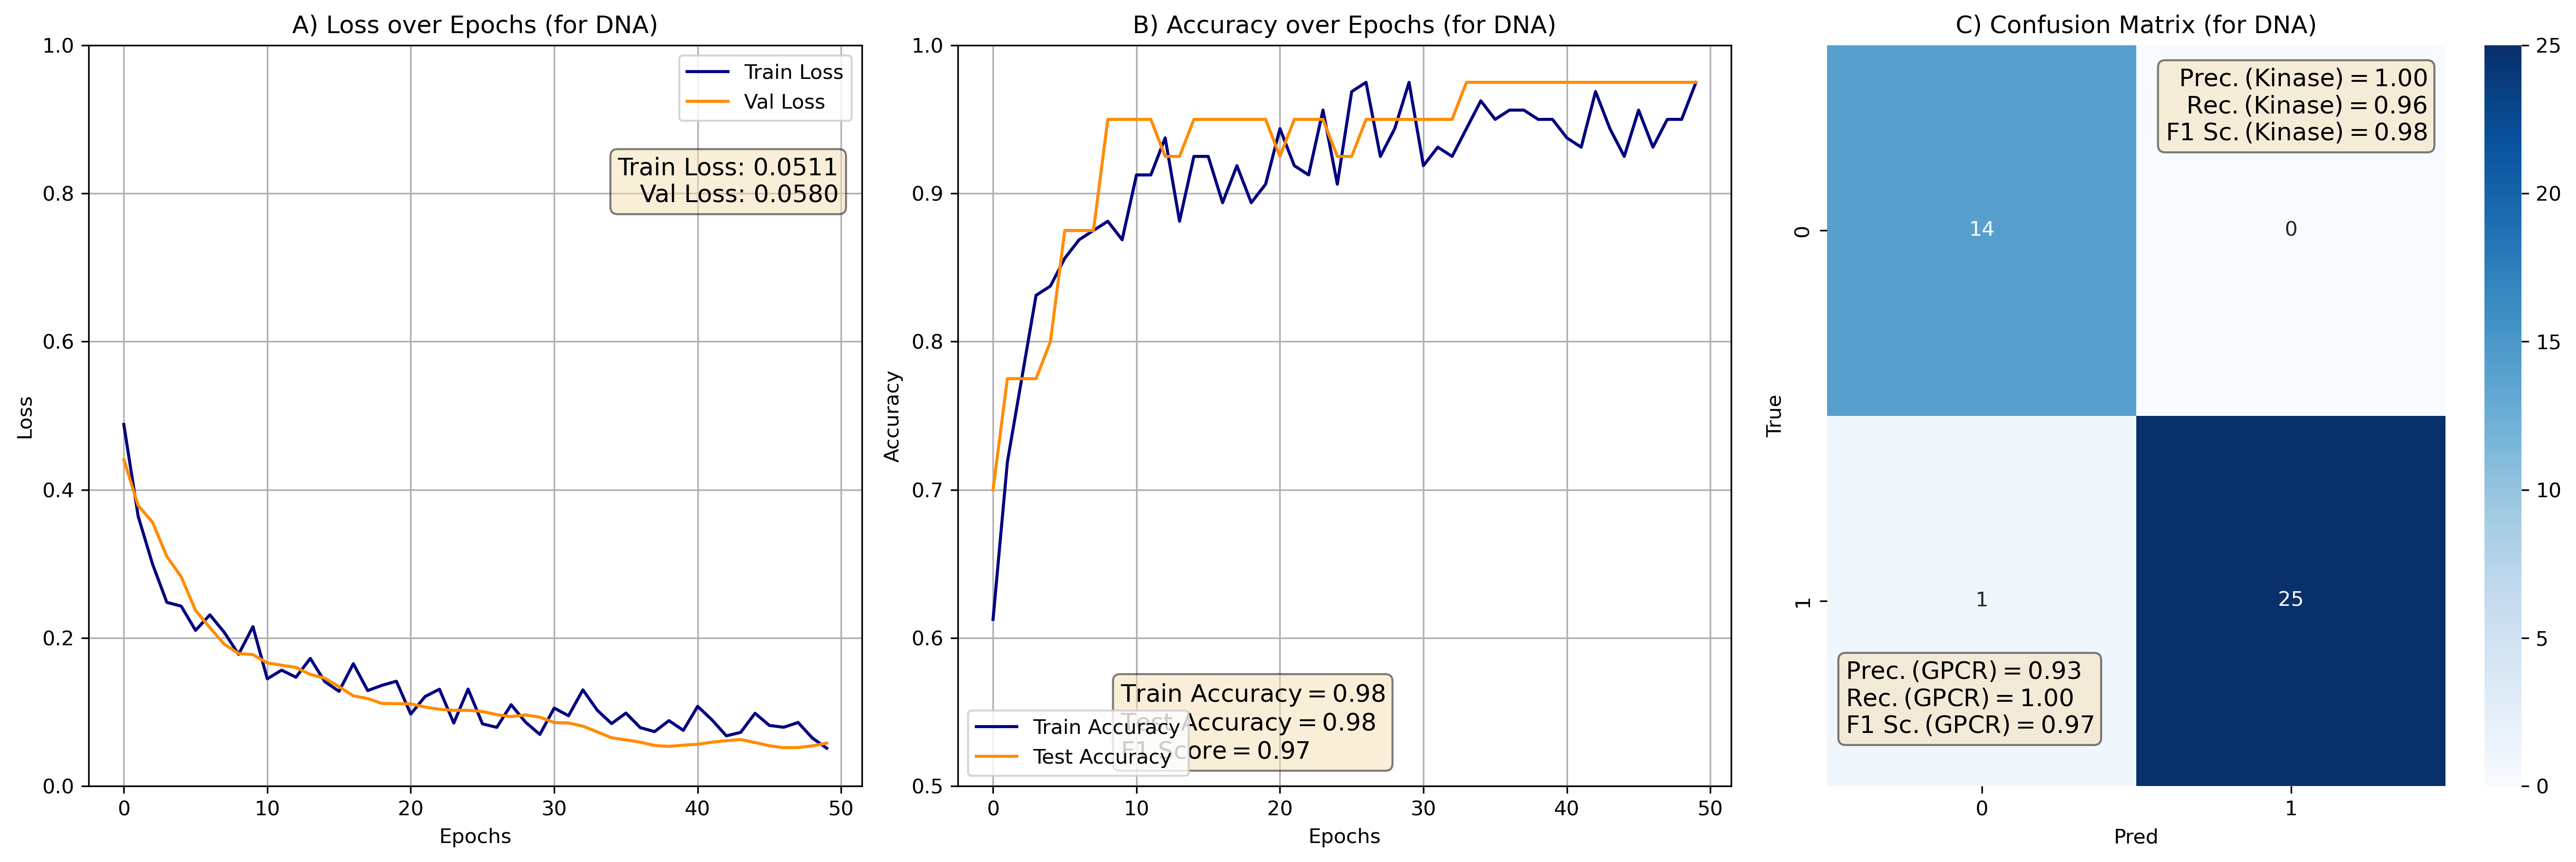

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics for class A (GPCR) (label 0) and class B (Kinase) (label 1)
precision_A = precision_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
recall_A = recall_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
f1_A = f1_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')

precision_B = precision_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
recall_B = recall_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
f1_B = f1_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')

# Prepare the text for the confusion matrix plot
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec.(Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Get the last training and validation accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create text string for the training accuracy, validation accuracy and F1 score
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average='macro'))))

# Start figure and axis
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=300)

# Plot loss
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (for DNA)')
ax[0].set_ylim(0.0, 1.0)  # Kayıp grafiği için aralığı burada ayarlıyorsunuz

# Plot accuracy
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (for DNA)')
ax[1].set_ylim(0.5, 1.0)  # Doğruluk grafiği için aralığı burada ayarlıyorsunuz

# Place a text box in upper left in loss plot (first subplot)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0].text(0.97, 0.85, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}', transform=ax[0].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)

# Place a text box in upper left in accuracy plot (second subplot)
ax[1].text(0.21, 0.14, textstr, transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Pred')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (for DNA)')

# Place text box for class A metrics in the left of confusion matrix plot
ax[2].text(0.03, 0.17, textstr_A, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Place text box for class B metrics in the right of confusion matrix plot
ax[2].text(0.97, 0.97, textstr_B, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()


### STEP 6: 10-FOLD CROSS-VALIDATION AND METRIC AVERAGE
- Due to the scholastic nature of Artificial Neural Networks, there can be reasonable variations in each run. In order to more objectively evaluate the performance of Complex Valued Convolutional Neural Networks on complex datasets, 10-fold cross-validation was applied. At the end of the study, the mean and standard deviation of the metric results obtained at each level were calculated.

In [76]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv1D, Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Custom activation function
def complex_tanh(z):
    return tf.complex(tf.math.tanh(tf.math.real(z)), tf.math.tanh(tf.math.imag(z)))

# Complex Conv1D layer
class ComplexConv1D(Layer):
    def __init__(self, filters, kernel_size, activation=None, **kwargs):
        super(ComplexConv1D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(self.kernel_size, input_shape[-1], self.filters, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.filters, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        conv_real = tf.nn.conv1d(inputs_real, kernel_real, stride=1, padding='SAME') - tf.nn.conv1d(inputs_imag, kernel_imag, stride=1, padding='SAME') + bias_real
        conv_imag = tf.nn.conv1d(inputs_real, kernel_imag, stride=1, padding='SAME') + tf.nn.conv1d(inputs_imag, kernel_real, stride=1, padding='SAME') + bias_imag

        output = tf.complex(conv_real, conv_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

# Custom loss function
def wirtinger_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz = tf.math.conj(y_pred - y_true)
    dF_dz_star = (y_pred - y_true)
    return tf.math.abs(dF_dz)**2 + tf.math.abs(dF_dz_star)**2

# Load the data
data = pd.read_excel("D://datasetTEZ//KİNASE_GPCR_DNA_Complex_Encoded.xlsx")

X = np.array([np.array(list(map(float, x_real.strip("[]").split(',')))) + 1j * np.array(list(map(float, x_imag.strip("[]").split(',')))) for x_real, x_imag in zip(data['Real'], data['Imag'])])
y = data['label'].values

# Convert labels to one-hot encoded format
y = to_categorical(y, num_classes=2)

# Reshape data for Conv1D input
X = np.expand_dims(X, axis=-1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]), dtype=tf.complex64)

    complex_conv1 = ComplexConv1D(filters=8, kernel_size=3, activation=complex_tanh)(input_layer)
    complex_conv2 = ComplexConv1D(filters=4, kernel_size=3, activation=complex_tanh)(complex_conv1)
    flattened = Flatten()(complex_conv2)

    complex_dense1 = Dense(8, activation='tanh')(flattened)
    dropout1 = Dropout(0.5)(complex_dense1)
    complex_dense2 = Dense(4, activation='tanh')(dropout1)
    dropout2 = Dropout(0.5)(complex_dense2)

    output_layer = Dense(2, activation='softmax')(dropout2)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=Adam(learning_rate=0.001), loss=wirtinger_loss, metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)  # Make fit silent

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
    precision = precision_score(y_test_classes, y_pred_classes, average='macro')
    recall = recall_score(y_test_classes, y_pred_classes, average='macro')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Calculate means and standard deviations
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

std_accuracy = np.std(accuracy_scores)
std_f1 = np.std(f1_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)

print(f"\nAverage Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})")
print(f"Average Precision: {mean_precision:.4f} (±{std_precision:.4f})")
print(f"Average Recall: {mean_recall:.4f} (±{std_recall:.4f})")
print(f"Average F1 Score: {mean_f1:.4f} (±{std_f1:.4f})")


1/1 [==============================] - 0s 113ms/step
Fold 1 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
1/1 [==============================] - 0s 111ms/step
Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
1/1 [==============================] - 0s 114ms/step
Fold 3 - Accuracy: 0.9500, Precision: 0.9583, Recall: 0.9444, F1 Score: 0.9488
1/1 [==============================] - 0s 123ms/step
Fold 4 - Accuracy: 0.9000, Precision: 0.9000, Recall: 0.9167, F1 Score: 0.8990
1/1 [==============================] - 0s 115ms/step
Fold 5 - Accuracy: 0.9500, Precision: 0.9375, Recall: 0.9615, F1 Score: 0.9467
1/1 [==============================] - 0s 116ms/step
Fold 6 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
1/1 [==============================] - 0s 126ms/step
Fold 7 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
1/1 [==============================] - 0s 110ms/step
Fold 8 - Accuracy: 1.00